Projeto 3

In [61]:
#constantes:
from math import pi 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
g = 9.8 #m/s^2
p = 1.2928 #kg/m^3
Cd = 0.25#kg/m
a = 0.25 #m
b = 0.1 #m
m1 = 89 #kg
m = 90 #experimental
A = 4*pi*a*b #m^2
l1 = 50 #m
l = 30 #experimental
k = 3.063
c = 0.25
alt = 200 #m (altura do salto)

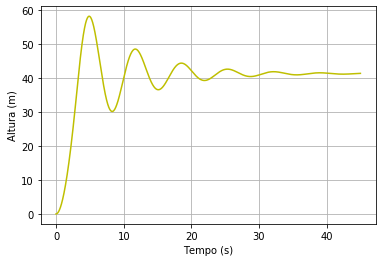

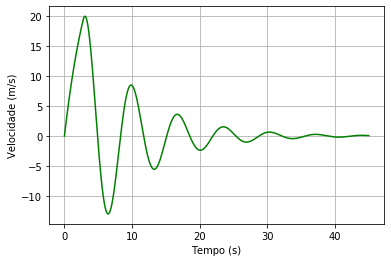

<Figure size 432x288 with 0 Axes>

In [62]:
def equacao(lista,t):
    x = lista[0]
    v = lista[1]
    dxdt = v
    elong=x*3.281
    if elong<=16.03:
        k1= 162
    else:
        k1=77
    Far = (1/2)*p*Cd*A*(v**2)
    Fel = k1 * (x - l)
    if x<=l:
        Fel = 0
    else:
        Fel = k1*(x-l)
    dvdt = g - Far/m1 - Fel/m1 -0.25*v
    if x>=alt:
        dvdt=0
        dxdt=0
    return dxdt,dvdt



tf = 45
delta_t=0.01
tempo = np.arange(0,tf,delta_t)
inicio = [0,0]
sol = odeint(equacao,inicio,tempo)
plt.plot(tempo,sol[:,0],"y")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.show()
plt.savefig('1.png')

plt.plot(tempo,sol[:,1],"g")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.grid(True)
plt.show()
plt.savefig('2.png')


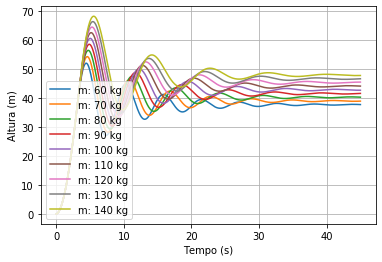

<Figure size 432x288 with 0 Axes>

In [63]:
lista_m = np.arange(60,150,10)

def equacao(lista,t,m1):
    x = lista[0]
    v = lista[1]
    dxdt = v
    elong=x*3.281
    if elong<=16.03:
        k1= 162
    else:
        k1=77
    Far = (1/2)*p*Cd*A*(v**2)
    Fel = k1 * (x - l)
    if x<=l:
        Fel = 0
    else:
        Fel = k1*(x-l)
    dvdt = g - Far/m1 - Fel/m1 -0.25*v
    if x>=alt:
        dvdt=0
        dxdt=0
    return dxdt,dvdt


for i in lista_m:
    sol3 = odeint(equacao,inicio,tempo, args = (i,))
    plt.plot(tempo,sol3[:,0],label='m: %.f kg' %i)
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.show()
plt.savefig('3.png')

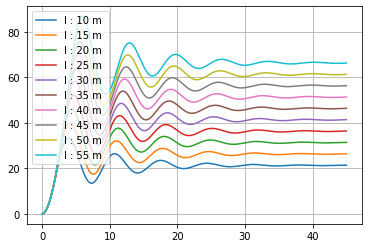

<Figure size 432x288 with 0 Axes>

In [64]:
def equacao(lista,t,l):
    x = lista[0]
    v = lista[1]
    dxdt = v
    elong=x*3.281
    if elong<=16.03:
        k1= 162
    else:
        k1=77
    Far = (1/2)*p*Cd*A*(v**2)
    Fel = k1 * (x - l)
    if x<=l:
        Fel = 0
    else:
        Fel = k1*(x-l)
    dvdt = g - Far/m1 - Fel/m1 -0.25*v
    if x>=alt:
        dvdt=0
        dxdt=0
    return dxdt,dvdt

lista_l = np.arange(10,60,5)

for i in lista_l:
    sol3 = odeint(equacao,inicio,tempo, args = (i,))
    plt.plot(tempo,sol3[:,0],label='l : %.f m ' %i)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('4.png')

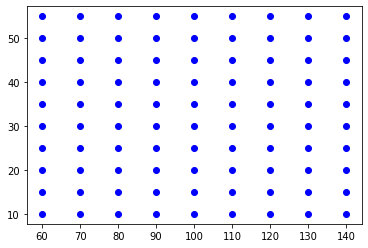

[40 37 34 31 28 25 22 19 16 13]


<Figure size 432x288 with 0 Axes>

In [65]:
lista_m = np.arange(60,150,10)
lista_l1 = np.arange(40,10,-3)
def equacao4(lista,t,m1,l):
    x = lista[0]
    v = lista[1]
    dxdt = v
    elong=x*3.281
    if elong<=16.03:
        k1= 162
    else:
        k1=77
    Far = (1/2)*p*Cd*A*(v**2)
    Fel = k1 * (x - l)
    if x<=l:
        Fel = 0
    else:
        Fel = k1*(x-l)
    dvdt = g - Far/m1 - Fel/m1 -0.25*v
    if x>=alt:
        dvdt=0
        dxdt=0
    return dxdt,dvdt
lista_kg = []
lista_corda = []
for m in lista_m:
    for l in lista_l:
        sol4 = odeint(equacao4,inicio,tempo, args = (m,l))
        if max(sol4[:,0]) <= 180:
            plt.plot(m,l, 'bo')

            
plt.plot(lista_kg,lista_corda, 'ro')
plt.show()
print(lista_l1)
plt.savefig('5.png')
        